In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
%matplotlib inline

In [240]:
df = pd.read_csv('datasets/WINE.csv', index_col='Index')

In [241]:
df.head()

Target        Type  Alcohol  Density  Nitrogen    pH  Sugar     A  \
Index                                                                      
0           3  white_wine     7.50     1.02      7.51  3.19  10.85  25.1   
1           4  white_wine     7.65     1.02      3.41  3.40   1.54  23.9   
2           3    red_wine     8.10     1.02      0.25  3.76   2.11  21.7   
3           4  white_wine     8.80     1.01      6.35  3.11   3.82  24.3   
4           3    red_wine     7.80     1.02      5.34  3.51   3.25  27.3   

          B     C     D     Di     E     H     S     U     V  
Index                                                         
0      1.98  10.2  39.6  49.10  1.37  2.36  2.34  6.35  0.29  
1      1.58   4.2  38.5  48.16  0.94  2.42  3.07  7.65  0.05  
2      7.92   0.3  22.0  34.93  1.26  4.84  4.38  4.40  0.22  
3      1.45   4.2  16.5  33.77  1.01  1.49  8.18  3.60  0.10  
4      5.15   4.5  31.9  40.26  1.57  4.15  4.53  6.45  0.14

In [242]:
df.isnull().sum()

Target       0
Type         0
Alcohol      0
Density      0
Nitrogen     0
pH           0
Sugar        0
A           33
B            0
C            0
D            0
Di           0
E            0
H           16
S            0
U            0
V            0
dtype: int64

In [243]:
df.dropna(inplace=True)

In [244]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
df['Type'] = encoder.fit_transform(df['Type'])
df.head()

Target  Type  Alcohol  Density  Nitrogen    pH  Sugar     A     B  \
Index                                                                      
0           3     1     7.50     1.02      7.51  3.19  10.85  25.1  1.98   
1           4     1     7.65     1.02      3.41  3.40   1.54  23.9  1.58   
2           3     0     8.10     1.02      0.25  3.76   2.11  21.7  7.92   
3           4     1     8.80     1.01      6.35  3.11   3.82  24.3  1.45   
4           3     0     7.80     1.02      5.34  3.51   3.25  27.3  5.15   

          C     D     Di     E     H     S     U     V  
Index                                                   
0      10.2  39.6  49.10  1.37  2.36  2.34  6.35  0.29  
1       4.2  38.5  48.16  0.94  2.42  3.07  7.65  0.05  
2       0.3  22.0  34.93  1.26  4.84  4.38  4.40  0.22  
3       4.2  16.5  33.77  1.01  1.49  8.18  3.60  0.10  
4       4.5  31.9  40.26  1.57  4.15  4.53  6.45  0.14

In [245]:
df.shape

(5551, 17)

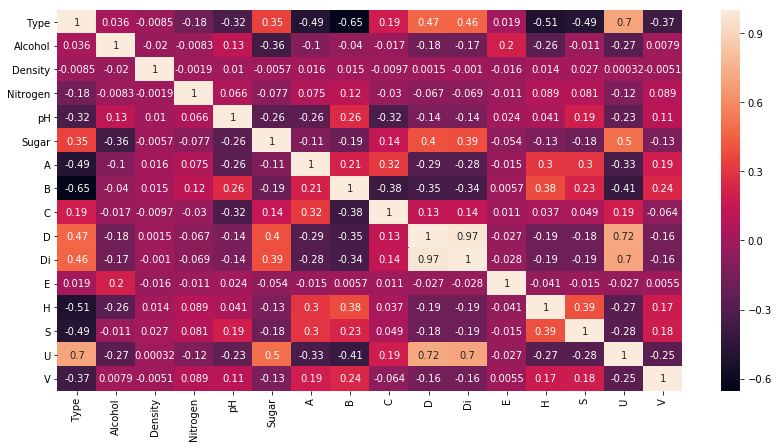

In [72]:
plt.figure(figsize=(14,7))
sns.heatmap(X.corr(), annot=True)

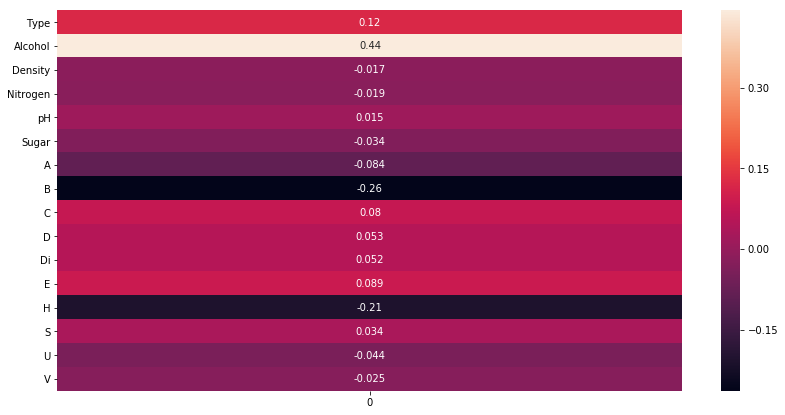

In [74]:
plt.figure(figsize=(14,7))
sns.heatmap(pd.DataFrame(X.corrwith(y)), annot=True)

array([3, 4, 5, 6, 2, 1], dtype=int64)

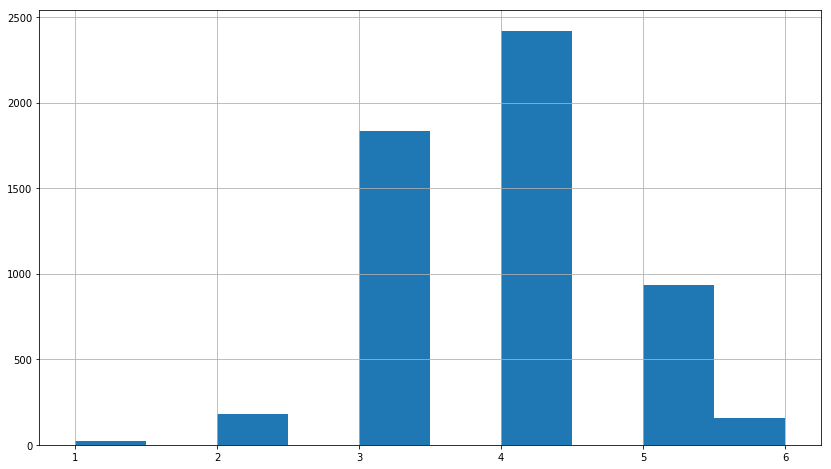

In [8]:
plt.figure(figsize=(14, 8))
df.Target.hist()
df.Target.unique()

In [9]:
t = df.Target
t_counts = t.groupby(by=t).count()
t_counts_max = t_counts.max()
t_counts

Target
1      25
2     181
3    1836
4    2420
5     931
6     158
Name: Target, dtype: int64

In [10]:
weights = t_counts.apply(lambda x: t_counts_max / x)
weights

Target
1    96.800000
2    13.370166
3     1.318083
4     1.000000
5     2.599356
6    15.316456
Name: Target, dtype: float64

C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


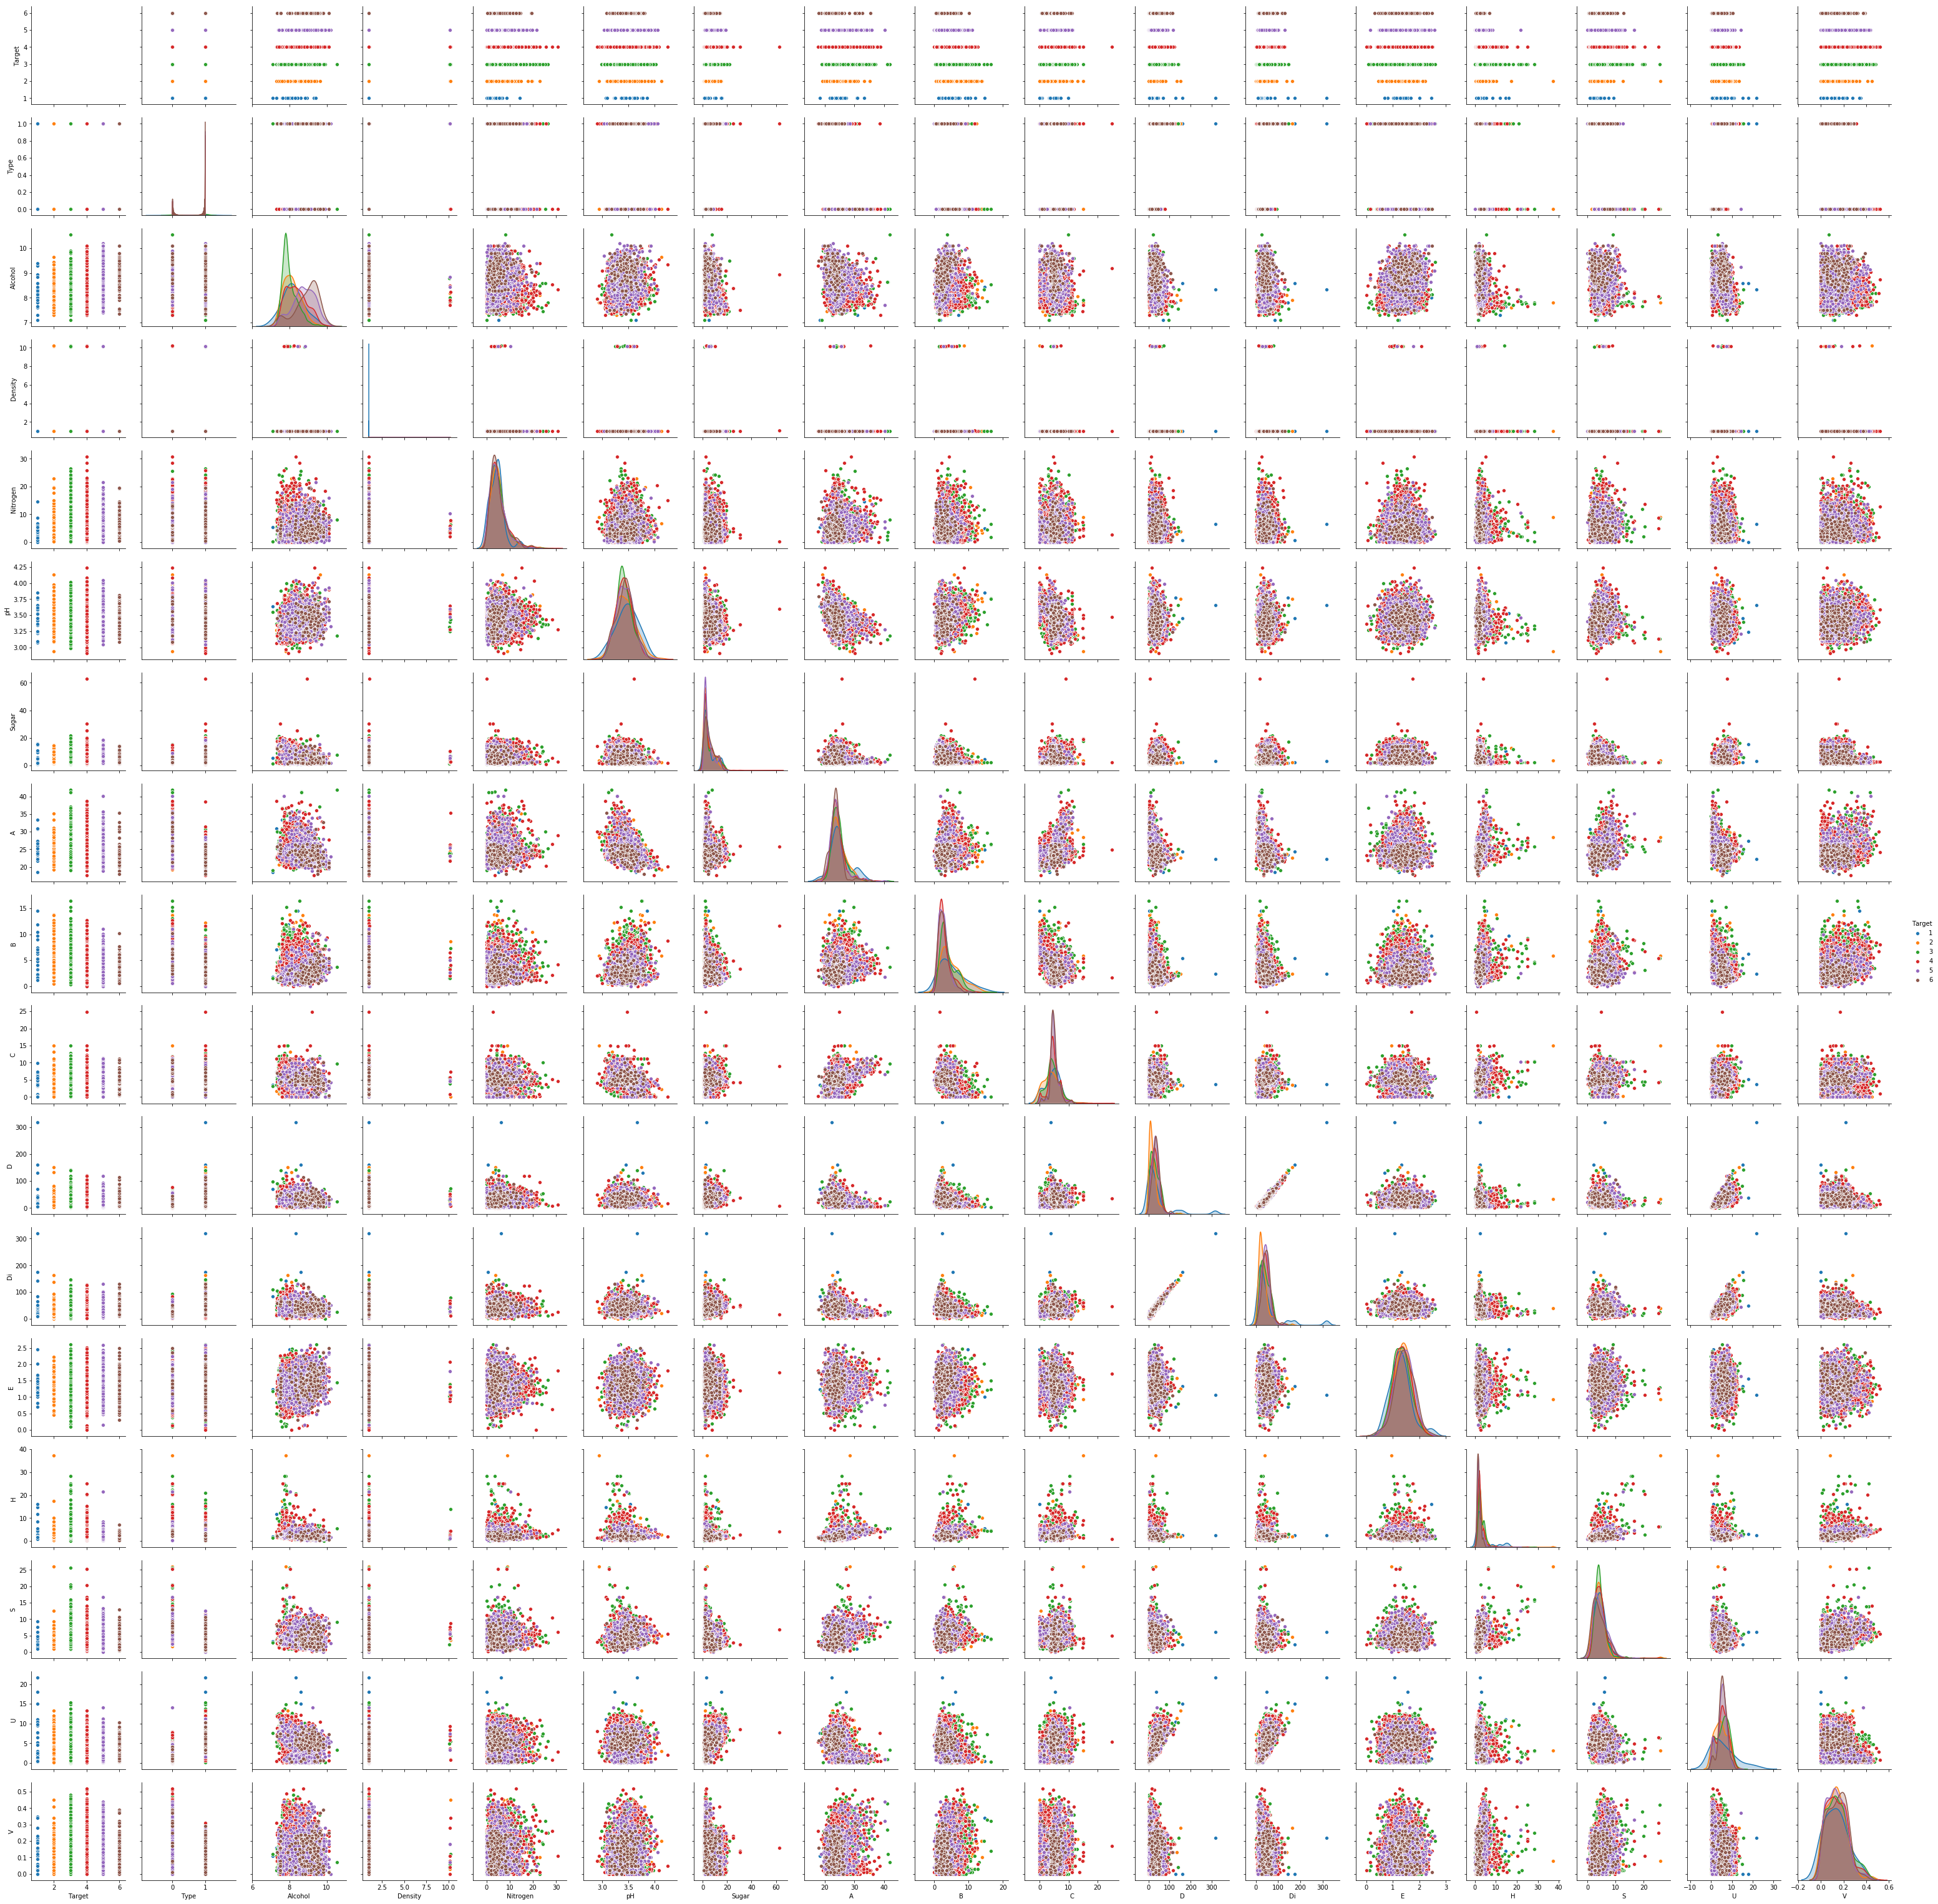

In [77]:
sns.pairplot(df, hue='Target')

C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


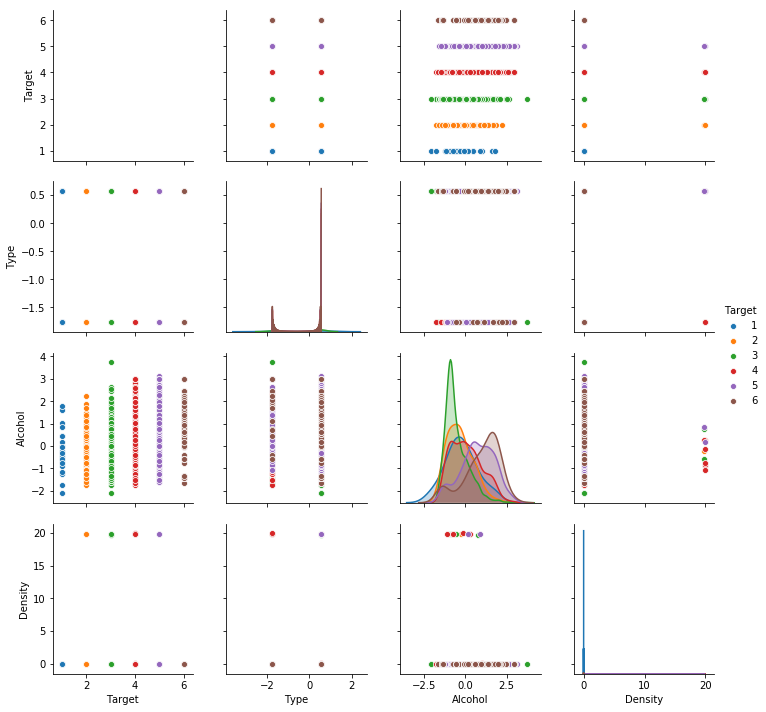

In [91]:
sns.pairplot(df.iloc[:, :4], hue='Target')

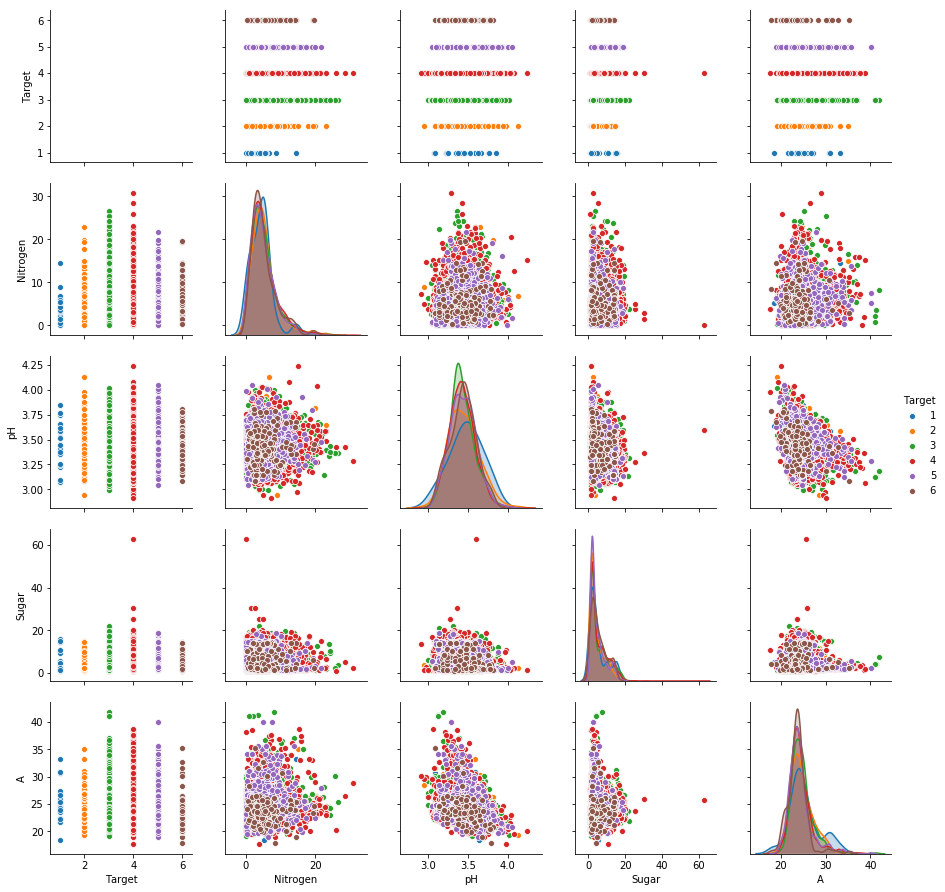

In [84]:
sns.pairplot(df.iloc[:, [0] + list(range(4,8))], hue='Target')

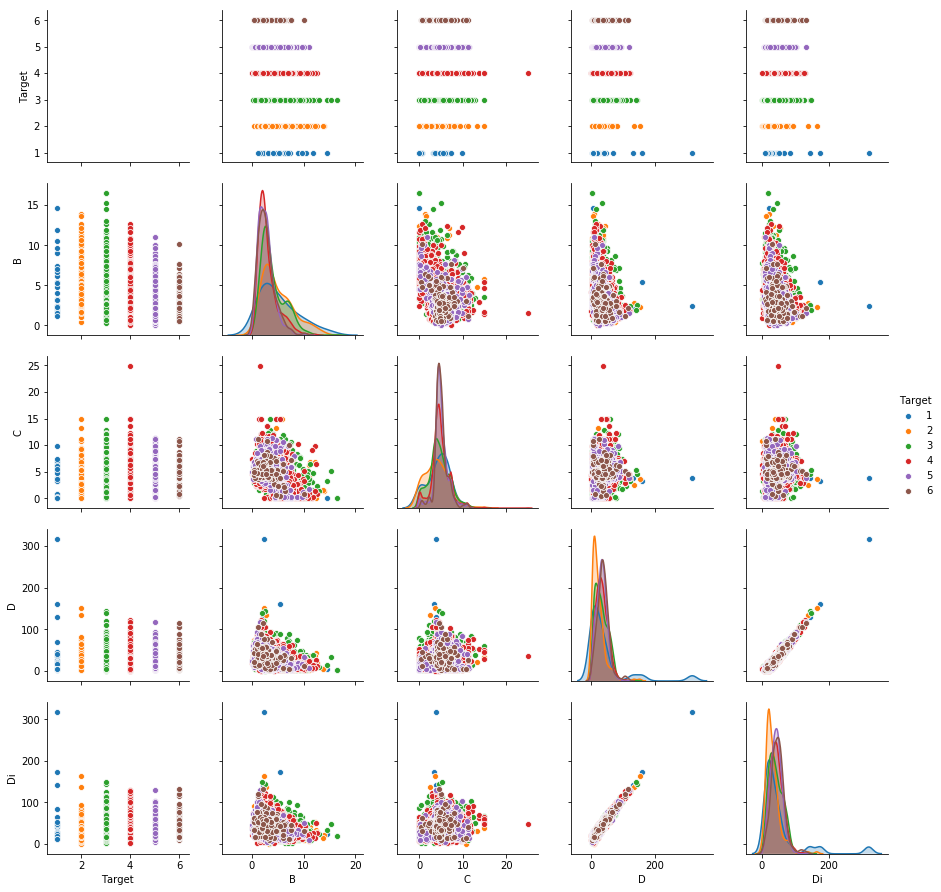

In [85]:
sns.pairplot(df.iloc[:, [0] + list(range(8, 12))], hue='Target')

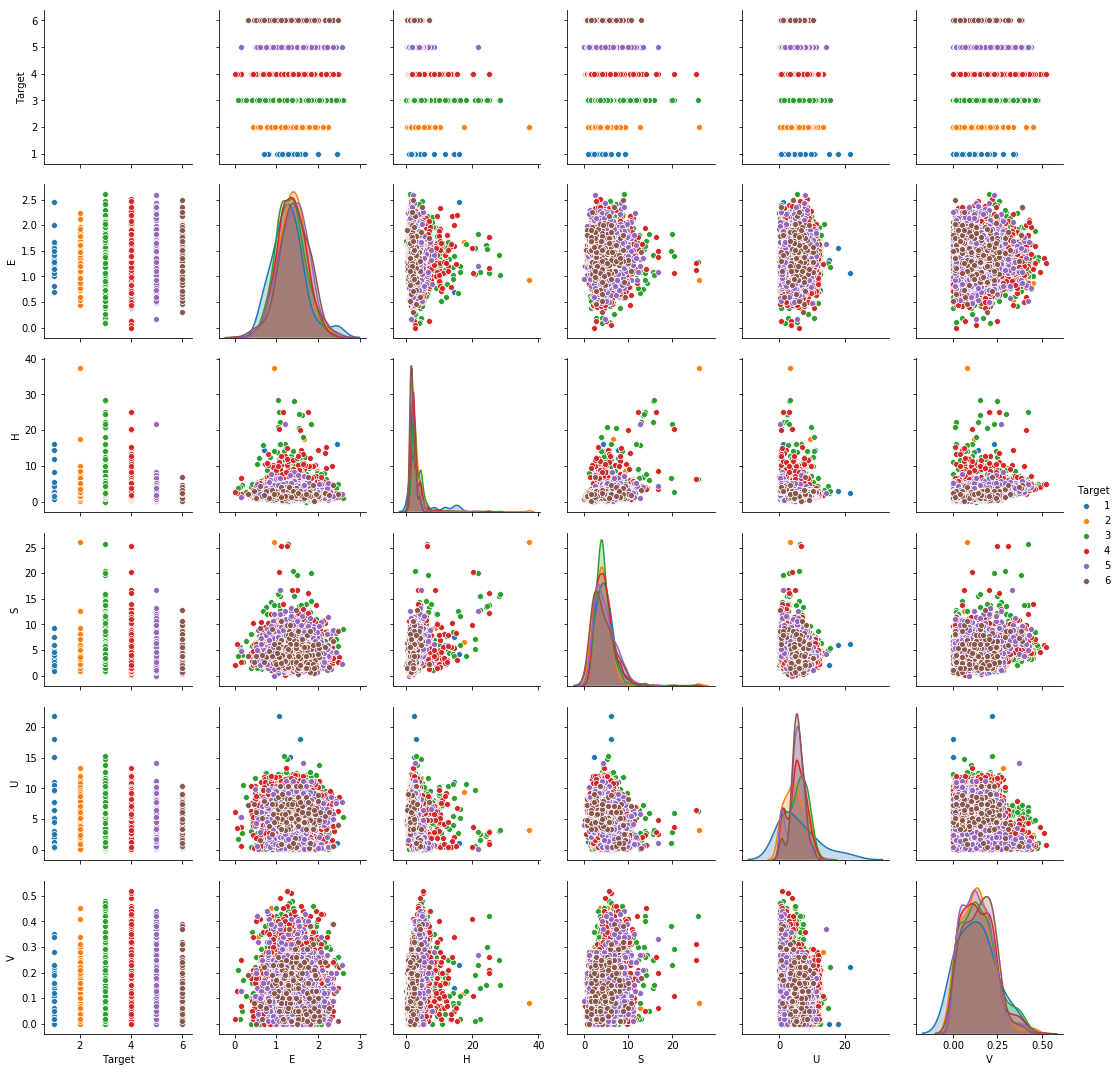

In [87]:
sns.pairplot(df.iloc[:, [0] + list(range(12, 17))], hue='Target')

In [247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
df.head()

Target  Type   Alcohol   Density  Nitrogen        pH     Sugar  \
Index                                                                   
0           3     1 -1.416327 -0.043360  0.612199 -1.444245  1.158653   
1           4     1 -1.162973 -0.043360 -0.496870 -0.170588 -0.894597   
2           3     0 -0.402911 -0.043360 -1.351663  2.012825 -0.768888   
3           4     1  0.779408 -0.065133  0.298414 -1.929448 -0.391760   
4           3     0 -0.909619 -0.043360  0.025204  0.496566 -0.517469   

              A         B         C         D        Di         E         H  \
Index                                                                         
0      0.217426 -0.668190  2.499494  0.357789  0.267022  0.007023 -0.259206   
1     -0.248765 -0.854183 -0.267310  0.301450  0.220366 -1.222848 -0.230980   
2     -1.103448  2.093809 -2.065732 -0.543634 -0.436291 -0.307595  0.907475   
3     -0.093368 -0.914631 -0.267310 -0.825328 -0.493867 -1.022636 -0.668485   
4      1.072109  0.805806 -0.128970 -0.036583 -0.171742  0.579056  0.582874   

              S         U         V  
Index                                
0     -1.012837  0.296470  1.524480  
1     -0.677838  0.758002 -1.013570  
2     -0.076675 -0.395829  0.784215  
3      1.667155 -0.679848 -0.484810  
4     -0.007840  0.331972 -0.061801

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5551 entries, 0 to 5599
Data columns (total 17 columns):
Target      5551 non-null int64
Type        5551 non-null int32
Alcohol     5551 non-null float64
Density     5551 non-null float64
Nitrogen    5551 non-null float64
pH          5551 non-null float64
Sugar       5551 non-null float64
A           5551 non-null float64
B           5551 non-null float64
C           5551 non-null float64
D           5551 non-null float64
Di          5551 non-null float64
E           5551 non-null float64
H           5551 non-null float64
S           5551 non-null float64
U           5551 non-null float64
V           5551 non-null float64
dtypes: float64(15), int32(1), int64(1)
memory usage: 758.9 KB


In [249]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [251]:
X_train = X_train.reset_index().drop('Index', axis=1)
X_test = X_test.reset_index().drop('Index', axis=1)
y_train = y_train.reset_index().drop('Index', axis=1).Target
y_test = y_test.reset_index().drop('Index', axis=1).Target

In [252]:
weights_train = y_train.apply(lambda i: weights[i])
weights_test = y_test.apply(lambda i: weights[i])

# Linear Models

In [253]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [254]:
model = linear_model.Ridge()

In [255]:
params = {
    'alpha': np.arange(0, 1, 5)
}

In [256]:
grid_ridge = GridSearchCV(model, params, n_jobs=-1, cv=5)

In [257]:
grid_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [258]:
y_pred = grid_ridge.best_estimator_.predict(X_test)

In [259]:
y_test[:5]

0    3
1    3
2    3
3    4
4    3
Name: Target, dtype: int64

In [260]:
y_pred[:5]

array([2.95530544, 4.33468684, 3.499694  , 3.64246596, 4.26349731])

In [261]:
grid_ridge.best_estimator_.score(X_test, y_test)

0.2898358130510984

In [262]:
model = linear_model.Lasso()
params = {
    'alpha': np.arange(0.1, 5, 10),
}
grid_lasso = GridSearchCV(model, params, n_jobs=-1, cv=5)

In [263]:
grid_lasso.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0.1])}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [264]:
print(grid_lasso.best_score_)
print(grid_lasso.score(X_test, y_test))

0.23235063003772227
0.23376233080403266


# Move to Classification Problem

In [265]:
from sklearn.preprocessing import OneHotEncoder
y_vector = y.values.reshape(y.shape[0], 1)
onehot_encoder = OneHotEncoder(categories='auto')
onehot_encoder.fit(y_vector)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [266]:
yv_train = onehot_encoder.transform(y_train.values.reshape(y_train.shape[0], 1)).toarray()
yv_test = onehot_encoder.transform(y_test.values.reshape(y_test.shape[0], 1)).toarray()

In [497]:
model_logistic = linear_model.LogisticRegression(class_weight=weights.to_dict())
params = {
    'penalty': ['l1'],
    'C': np.arange(0.1, 2, 5),
    'multi_class': ['auto'],
    'solver':['saga', 'liblinear'],
    'max_iter': [100]
}
grid_logistic = GridSearchCV(model_logistic, params, n_jobs=-1, cv=5)

In [498]:
yv_train.shape, X_train.shape

((4440, 6), (4440, 16))

In [501]:
grid_logistic.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1'], 'C': array([0.1]), 'multi_class': ['auto'], 'solver': ['saga', 'liblinear'], 'max_iter': [100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [502]:
estimator = grid_logistic.best_estimator_
y_pred = estimator.predict(X_test)
estimator.score(X_test, y_test)

0.5472547254725473

In [271]:
def roc_auc(y_true, y_pred):
    y_enc_test = onehot_encoder.transform(y_true.values.reshape(-1, 1)).toarray()
    y_enc_pred = onehot_encoder.transform(y_pred.reshape(-1, 1)).toarray()
    score = (roc_auc_score(y_enc_test, y_enc_pred, average='macro'),
            roc_auc_score(y_enc_test, y_enc_pred, average='micro'))
    return score

In [272]:
roc_auc(y_test, y_pred)

(0.6025303521596043, 0.6878487848784879)

In [273]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.30      0.39      0.34        31
           3       0.61      0.58      0.59       387
           4       0.57      0.47      0.51       475
           5       0.37      0.38      0.37       188
           6       0.07      0.15      0.10        27

   micro avg       0.48      0.48      0.48      1111
   macro avg       0.32      0.33      0.32      1111
weighted avg       0.53      0.48      0.50      1111



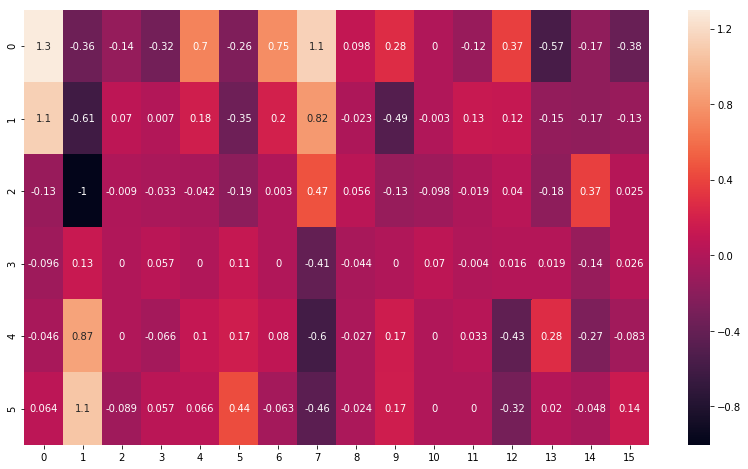

In [405]:
plt.figure(figsize=(14, 8))
sns.heatmap(pd.DataFrame(np.around(estimator.coef_, 3)), annot=True)

In [274]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
poly.fit(X)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [275]:
X_poly_train = poly.transform(X_train)
X_poly_test = poly.transform(X_test)
X_poly_train.shape

(4440, 969)

In [276]:
model_logistic = linear_model.LogisticRegression(class_weight=weights.to_dict())
grid_logistic = GridSearchCV(model_logistic, params, n_jobs=-1, cv=5)
grid_logistic.fit(X_poly_train, y_train)
estimator = grid_logistic.best_estimator_
y_pred = estimator.predict(X_poly_test)
estimator.score(X_poly_test, y_test)

0.504950495049505

In [277]:
roc_auc(y_test, y_pred)

(0.6100565725107622, 0.702970297029703)

In [278]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1    2    3   4   5
0  0   1    0    1   0   1
1  2   7   18    3   1   0
2  2  34  218  116  13   4
3  3  19   93  241  91  28
4  0   4    8   62  88  26
5  0   0    1    5  14   7

In [279]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.11      0.23      0.15        31
           3       0.64      0.56      0.60       387
           4       0.56      0.51      0.53       475
           5       0.43      0.47      0.45       188
           6       0.11      0.26      0.15        27

   micro avg       0.50      0.50      0.50      1111
   macro avg       0.31      0.34      0.31      1111
weighted avg       0.54      0.50      0.52      1111



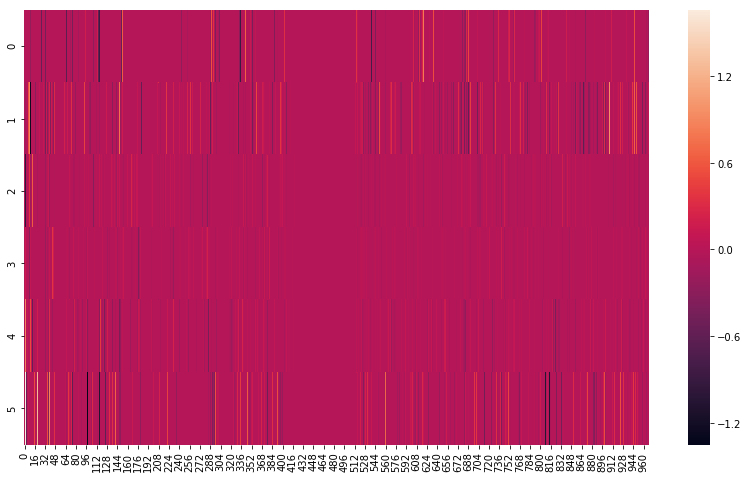

In [151]:
plt.figure(figsize=(14,8))
sns.heatmap(pd.DataFrame(np.around(estimator.coef_, 3)))

In [280]:
sgd = linear_model.SGDClassifier(n_jobs=-1, class_weight=weights.to_dict())
params = {
    'loss': ['log'],
    'alpha': [0.0001],
    'l1_ratio': [0.5],
    'max_iter': [1000]
}
grid_sgd = GridSearchCV(sgd, params, n_jobs=-1, cv=5)

In [281]:
grid_sgd.fit(X_poly_train, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False,
       class_weight={1: 96.8, 2: 13.370165745856353, 3: 1.318082788671024, 4: 1.0, 5: 2.5993555316863586, 6: 15.316455696202532},
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal'...dom_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'loss': ['log'], 'alpha': [0.0001], 'l1_ratio': [0.5], 'max_iter': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [282]:
estimator = grid_sgd.best_estimator_
y_pred = estimator.predict(X_poly_test)
print(grid_sgd.best_score_)

0.4313063063063063


In [283]:
np.around(estimator.coef_, 2).max()

199.85

In [284]:
roc_auc(y_test, y_pred)

(0.5753574877057712, 0.6630063006300629)

In [285]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1    2    3    4   5
0  0   1    0    1    0   1
1  4   6   15    4    1   1
2  4  27  195  138   19   4
3  6  24  115  199  103  28
4  2   8   12   61   83  22
5  0   0    2    9   12   4

In [286]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.09      0.19      0.12        31
           3       0.58      0.50      0.54       387
           4       0.48      0.42      0.45       475
           5       0.38      0.44      0.41       188
           6       0.07      0.15      0.09        27

   micro avg       0.44      0.44      0.44      1111
   macro avg       0.27      0.28      0.27      1111
weighted avg       0.48      0.44      0.45      1111



# XGBoost

In [287]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [288]:
xgb_model = xgb.XGBClassifier(n_jobs=-1, n_estimators=500, max_depth=3, objective='multi:softmax',
                             reg_lambda=2, learning_rate=0.01)

In [289]:
xgb_model.fit(X_train, y_train, sample_weight=weights_train.values,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              sample_weight_eval_set=[weights_train.values, weights_test.values]
             )

[0]	validation_0-merror:0.520288	validation_1-merror:0.663758
[1]	validation_0-merror:0.500572	validation_1-merror:0.677468
[2]	validation_0-merror:0.506254	validation_1-merror:0.678022
[3]	validation_0-merror:0.50821	validation_1-merror:0.676865
[4]	validation_0-merror:0.497881	validation_1-merror:0.677759
[5]	validation_0-merror:0.498138	validation_1-merror:0.678022
[6]	validation_0-merror:0.497803	validation_1-merror:0.678022
[7]	validation_0-merror:0.505835	validation_1-merror:0.677759
[8]	validation_0-merror:0.485779	validation_1-merror:0.662321
[9]	validation_0-merror:0.487417	validation_1-merror:0.664358
[10]	validation_0-merror:0.486679	validation_1-merror:0.663201
[11]	validation_0-merror:0.485111	validation_1-merror:0.664095
[12]	validation_0-merror:0.485101	validation_1-merror:0.666255
[13]	validation_0-merror:0.485504	validation_1-merror:0.665484
[14]	validation_0-merror:0.483268	validation_1-merror:0.665253
[15]	validation_0-merror:0.488039	validation_1-merror:0.670147
[16

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=2, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [290]:
xgb_model.feature_importances_

array([0.03252529, 0.11620927, 0.0616552 , 0.04988674, 0.03366658,
       0.05052957, 0.04307101, 0.06043258, 0.05668942, 0.09028571,
       0.06940135, 0.05099678, 0.06471831, 0.04817957, 0.11426774,
       0.05748494], dtype=float32)

In [291]:
xgb_model.score(X_train, y_train, sample_weight=weights_train.values)

0.6824162875016343

In [292]:
y_train_pred = xgb_model.predict(X_train)
roc_auc(y_train, y_train_pred)

(0.7804809084817858, 0.6702702702702703)

In [293]:
pd.DataFrame(confusion_matrix(y_train, y_train_pred), index=range(1, 7), columns=range(1, 7))

1    2    3    4    5    6
1  22    0    0    0    0    0
2   2  120   15    8    3    2
3  28  244  853  162  114   48
4  24  175  468  512  473  293
5   4   24   46   75  376  218
6   0    2    0    3    9  117

In [294]:
y_pred = xgb_model.predict(X_test)
xgb_model.score(X_test, y_test, sample_weight=weights_test.values)

0.4049123868293316

In [295]:
roc_auc(y_test, y_pred)

(0.6273072033639798, 0.6295229522952296)

In [296]:
pd.DataFrame(confusion_matrix(y_test, y_pred), index=range(1, 7), columns=range(1, 7))

1   2    3    4    5   6
1   0   1    1    0    1   0
2   2  16   10    2    0   1
3  13  79  209   46   27  13
4   8  46  119  102  116  84
5   0   4   16   23   82  63
6   0   1    1    2    7  16

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.19      0.52      0.27        31
           3       0.66      0.65      0.65       387
           4       0.61      0.33      0.43       475
           5       0.36      0.56      0.44       188
           6       0.16      0.52      0.25        27

   micro avg       0.49      0.49      0.49      1111
   macro avg       0.33      0.43      0.34      1111
weighted avg       0.56      0.49      0.50      1111



# Over Sampling!

In [305]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [307]:
Counter(y_train)

Counter({4: 1945, 3: 1449, 2: 150, 5: 743, 6: 131, 1: 22})

In [301]:
X_train.head()

Type   Alcohol   Density  Nitrogen        pH     Sugar         A         B  \
0     1  0.694956 -0.043360 -0.031602 -0.473840  1.577683  0.450521  0.559365   
1     1  0.272700 -0.043360 -0.935087 -0.959043  0.393371  0.528219 -0.300853   
2     0  0.272700 -0.043360 -0.026192  1.224370 -0.559372 -0.248765  1.419584   
3     1  1.539469 -0.065133  0.090125 -0.655791  0.466150 -0.248765 -0.054412   
4     1 -0.825167 -0.065133 -0.120868 -0.777092 -0.916651 -0.559559 -0.054412   

          C         D        Di         E         H         S         U  \
0  1.185262  0.357789  0.427339 -0.164587 -0.668485 -1.214754  0.740251   
1 -0.059800  0.357789  0.180659  1.837528 -0.640259 -1.485506  0.669246   
2 -2.204073 -0.543634 -0.419912 -1.852084  0.728710 -0.076675 -1.336644   
3 -0.059800 -0.092922  0.090325  1.437105 -0.466198  0.258324  0.331972   
4  2.776175 -1.332379 -2.170005 -0.822425  0.145369  0.258324  0.615992   

          V  
0 -0.167553  
1  0.995719  
2  0.149703  
3 -0.696314  
4 -0.167553

In [313]:
sm = SMOTENC(random_state=0, categorical_features=[0])

In [315]:
X_over, y_over = sm.fit_resample(X, y)

In [319]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.2, random_state=0)

In [409]:
yv_over_train = onehot_encoder.transform(y_over_train.reshape(y_over_train.shape[0], 1)).toarray()
yv_over_test = onehot_encoder.transform(y_over_test.reshape(y_over_test.shape[0], 1)).toarray()

In [354]:
Counter(y_over_train)

Counter({3: 1958, 4: 1969, 6: 1962, 5: 1912, 1: 1927, 2: 1888})

## Try to fit

In [395]:
xgb_model = xgb.XGBClassifier(n_jobs=-1, n_estimators=400, max_depth=6, objective='multi:softmax',
                              learning_rate=0.1)

In [396]:
xgb_model.fit(X_over_train, y_over_train,
             eval_set=[(X_over_train, y_over_train), (X_over_test, y_over_test)])

[0]	validation_0-merror:0.377238	validation_1-merror:0.429752
[1]	validation_0-merror:0.335658	validation_1-merror:0.400826
[2]	validation_0-merror:0.317149	validation_1-merror:0.381198
[3]	validation_0-merror:0.298382	validation_1-merror:0.359848
[4]	validation_0-merror:0.282627	validation_1-merror:0.34332
[5]	validation_0-merror:0.272297	validation_1-merror:0.340909
[6]	validation_0-merror:0.262741	validation_1-merror:0.330234
[7]	validation_0-merror:0.25594	validation_1-merror:0.318526
[8]	validation_0-merror:0.245007	validation_1-merror:0.311639
[9]	validation_0-merror:0.238292	validation_1-merror:0.309917
[10]	validation_0-merror:0.22822	validation_1-merror:0.300964
[11]	validation_0-merror:0.225293	validation_1-merror:0.299587
[12]	validation_0-merror:0.220127	validation_1-merror:0.293044
[13]	validation_0-merror:0.21436	validation_1-merror:0.290289
[14]	validation_0-merror:0.210399	validation_1-merror:0.286846
[15]	validation_0-merror:0.205665	validation_1-merror:0.283747
[16]	v

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=400, n_jobs=-1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [397]:
xgb_model.score(X_over_test, y_over_test)

0.8674242424242424

In [398]:
y_pred = xgb_model.predict(X_over_test)
roc_auc(pd.Series(y_over_test), y_pred)

(0.9182103516453711, 0.9204545454545454)

In [399]:
pd.DataFrame(confusion_matrix(y_over_test, y_pred), index=range(1, 7), columns=range(1, 7))

1    2    3    4    5    6
1  493    0    0    0    0    0
2    0  516    9    2    5    0
3    1   24  315  111    9    2
4    1    4   92  306   45    3
5    0    1    6   52  440    9
6    0    0    0    4    5  449

In [400]:
print(classification_report(y_over_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       493
           2       0.95      0.97      0.96       532
           3       0.75      0.68      0.71       462
           4       0.64      0.68      0.66       451
           5       0.87      0.87      0.87       508
           6       0.97      0.98      0.98       458

   micro avg       0.87      0.87      0.87      2904
   macro avg       0.86      0.86      0.86      2904
weighted avg       0.87      0.87      0.87      2904



In [402]:
xgb_model = xgb.XGBClassifier(n_jobs=-1, n_estimators=400, max_depth=6, objective='multi:softmax',
                              learning_rate=0.1)
scores = cross_val_score(xgb_model, X_over_train, y_over_train, cv=10, n_jobs=-1)

In [403]:
scores.mean()

0.8570884339227977

# Random Forest

In [213]:
from sklearn.ensemble import RandomForestClassifier

In [484]:
clf = RandomForestClassifier(n_estimators=200,
                             random_state=0)

In [485]:
clf.fit(X_over_train, y_over_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [490]:
y_pred = clf.predict(X_over_test)
clf.score(X_over_test, y_over_test)

0.8787878787878788

In [489]:
roc_auc(pd.Series(y_over_test), y_pred)

(0.9245989636841325, 0.9272727272727274)

In [492]:
score = cross_val_score(clf, X_over_train, y_over_train, n_jobs=-1, cv=10)
score.mean()

0.8653517658800984

In [493]:
pd.DataFrame(confusion_matrix(y_over_test, y_pred), index=range(1, 7), columns=range(1, 7))

1    2    3    4    5    6
1  493    0    0    0    0    0
2    0  522    5    2    3    0
3    1   25  348   74   12    2
4    0   12   99  270   61    9
5    0    0    6   30  463    9
6    0    0    0    2    0  456

In [494]:
best_model = clf

In [477]:
params = {
    'n_estimators': range(100, 500, 25)
}
clf = RandomForestClassifier(n_jobs=-1)
grid_rf = GridSearchCV(clf, params, cv=5, n_jobs=-1)

In [478]:
grid_rf.fit(X_over_train, y_over_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [483]:
grid_rf.best_score_

0.8619146005509641

# NN

In [444]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf

In [85]:
from keras.callbacks import Callback

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]


    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        roc = roc_auc_score(self.y, y_pred)
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print('\rroc-auc: %s - roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        return

In [53]:
X_train.shape, yv_train.shape

((4440, 16), (4440, 6))

In [143]:
weight_dict = pd.Series(weights.values).to_dict()
weight_dict

{0: 96.8,
 1: 13.370165745856353,
 2: 1.318082788671024,
 3: 1.0,
 4: 2.5993555316863586,
 5: 15.316455696202532}

In [194]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/model-{epoch:03d}-{val_categorical_accuracy:03f}-{val_loss:03f}.h5', 
                             verbose=1, monitor='val_loss', save_best_only=True, mode='auto')  

In [473]:
adam = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [474]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(yv_train.shape[1], activation='softmax'))
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [475]:
model.fit(X_over_train, yv_over_train, epochs=1000, batch_size=32,
          validation_data=(X_over_test, yv_over_test), 
          callbacks=[roc_callback(training_data=(X_over_train, yv_over_train), validation_data=(X_over_test, yv_over_test)),
                     checkpoint])

Train on 11616 samples, validate on 2904 samples
Epoch 1/1000
11616/11616 [==============================] - 4s 365us/step - loss: 1.2279 - categorical_accuracy: 0.4855 - val_loss: 0.9942 - val_categorical_accuracy: 0.5919
roc-auc: 0.8841 - roc-auc_val: 0.8836                                                                                                    

Epoch 00001: val_loss did not improve from 0.46927
Epoch 2/1000
11616/11616 [==============================] - 2s 182us/step - loss: 0.9194 - categorical_accuracy: 0.6195 - val_loss: 0.8476 - val_categorical_accuracy: 0.6550
roc-auc: 0.9129 - roc-auc_val: 0.909                                                                                                    

Epoch 00002: val_loss did not improve from 0.46927
Epoch 3/1000
11616/11616 [==============================] - 2s 182us/step - loss: 0.8046 - categorical_accuracy: 0.6725 - val_loss: 0.7688 - val_categorical_accuracy: 0.6925
roc-auc: 0.9261 - roc-auc_val: 0.9215             

KeyboardInterrupt: 

In [422]:
y_pred = model.predict(X_over_test)

In [423]:
y_pred = np.argmax(y_pred, axis=1) + 1

In [425]:
roc_auc(pd.Series(y_over_test), y_pred)

(0.8885363272211975, 0.8917355371900827)

In [426]:
pd.DataFrame(confusion_matrix(y_over_test, y_pred), index=range(1, 7), columns=range(1, 7))

1    2    3    4    5    6
1  493    0    0    0    0    0
2    1  500   19   10    2    0
3    2   21  305  102   32    0
4    2   12  110  209  101   17
5    0    0   18   55  425   10
6    0    0    1    3    6  448

In [427]:
print(classification_report(y_over_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       493
           2       0.94      0.94      0.94       532
           3       0.67      0.66      0.67       462
           4       0.55      0.46      0.50       451
           5       0.75      0.84      0.79       508
           6       0.94      0.98      0.96       458

   micro avg       0.82      0.82      0.82      2904
   macro avg       0.81      0.81      0.81      2904
weighted avg       0.81      0.82      0.82      2904



# Conclusion

## The best model turned out Random Forest, it's obviously because features have small correlated with a target variable. Therefore all linear models are worse for this problem.<br>But XGBoost also gives the same result as Random Forest. 

## Random Forest have 0.86 score on cross validation and roc-auc 0.92<br> Oversampling  was more helpfull for this data
### Metrics was used such as roc-auc, cross val score, accuracy, crossentropy

In [504]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Write answer

In [506]:
df_test = pd.read_csv('datasets/TEST.csv', index_col='Index')

In [508]:
df_test.head()

Type  Alcohol  Density  Nitrogen    pH  Sugar     A     B      C  \
Index                                                                           
5600   white_wine     9.25     1.01      5.72  3.47   2.58  24.5  1.98   5.85   
5601   white_wine     7.45     1.02      7.04  3.20  10.76  25.1  1.72  10.20   
5602   white_wine     9.10     1.01     11.82  3.30   3.06  23.7  2.90   5.25   
5603     red_wine     7.90     1.02      3.96  3.51   2.11  24.9  7.39   1.05   
5604   white_wine     7.65     1.02      6.76  3.27  12.65  24.7  2.64   8.10   

          D     Di     E     H     S     U     V  
Index                                             
5600   30.8  48.30  1.29  1.49  4.67  4.80  0.06  
5601   40.7  55.05  1.05  2.23  2.04  6.35  0.05  
5602    9.9  22.11  1.29  1.80  4.53  7.90  0.03  
5603    7.7  18.07  1.09  5.64  5.26  0.85  0.38  
5604   67.1  85.00  1.26  2.48  3.36  7.83  0.18

In [509]:
df_test.shape

(790, 16)

In [510]:
df_test['Type'] = encoder.transform(df_test['Type'])

In [511]:
df_test.head()

Type  Alcohol  Density  Nitrogen    pH  Sugar     A     B      C     D  \
Index                                                                           
5600      1     9.25     1.01      5.72  3.47   2.58  24.5  1.98   5.85  30.8   
5601      1     7.45     1.02      7.04  3.20  10.76  25.1  1.72  10.20  40.7   
5602      1     9.10     1.01     11.82  3.30   3.06  23.7  2.90   5.25   9.9   
5603      0     7.90     1.02      3.96  3.51   2.11  24.9  7.39   1.05   7.7   
5604      1     7.65     1.02      6.76  3.27  12.65  24.7  2.64   8.10  67.1   

          Di     E     H     S     U     V  
Index                                       
5600   48.30  1.29  1.49  4.67  4.80  0.06  
5601   55.05  1.05  2.23  2.04  6.35  0.05  
5602   22.11  1.29  1.80  4.53  7.90  0.03  
5603   18.07  1.09  5.64  5.26  0.85  0.38  
5604   85.00  1.26  2.48  3.36  7.83  0.18

In [515]:
df_test.iloc[:, 1:] = scaler.transform(df_test.iloc[:, 1:])
df_test.head()

Type   Alcohol   Density  Nitrogen        pH     Sugar         A  \
Index                                                                     
5600      1  1.539469 -0.065133  0.127996  0.253964 -0.665233 -0.015670   
5601      1 -1.500778 -0.043360  0.485062 -1.383595  1.138804  0.217426   
5602      1  1.286115 -0.065133  1.778073 -0.777092 -0.559372 -0.326464   
5603      0 -0.740716 -0.043360 -0.348092  0.496566 -0.768888  0.139727   
5604      1 -1.162973 -0.043360  0.409320 -0.959043  1.555629  0.062029   

              B         C         D        Di         E         H         S  \
Index                                                                         
5600  -0.668190  0.493561 -0.092922  0.227314 -0.221790 -0.668485  0.056407   
5601  -0.789086  2.499494  0.414128  0.562344 -0.908230 -0.320363 -1.150507   
5602  -0.240406  0.216881 -1.163362 -1.072599 -0.221790 -0.522650 -0.007840   
5603   1.847368 -1.719882 -1.276040 -1.273120 -0.793823  1.283824  0.327159   
5604  -0.361301  1.531113  1.766263  2.048880 -0.307595 -0.202754 -0.544756   

              U         V  
Index                      
5600  -0.253819 -0.907818  
5601   0.296470 -1.013570  
5602   0.846758 -1.225074  
5603  -1.656166  2.476248  
5604   0.821906  0.361207

In [516]:
y_ans = clf.predict(df_test)

In [525]:
y_ans[:10]

array([5, 3, 4, 3, 4, 4, 3, 3, 4, 4], dtype=int64)

In [524]:
df_ans = pd.DataFrame({'Index': df_test.index, 'Target': y_ans})
df_ans.head()

Index  Target
0   5600       5
1   5601       3
2   5602       4
3   5603       3
4   5604       4

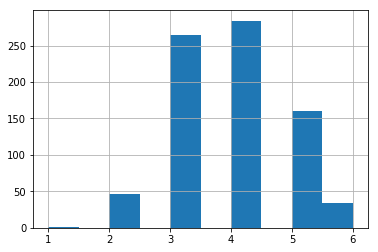

In [529]:
df_ans.Target.hist()

In [527]:
df_ans.to_csv('test_submission.csv', index=False)